In [ ]:
from pylab import *
from numpy import NaN
from matplotlib.colors import LogNorm

dr, dx = .001, .001
max_it = 1000000

R = arange(2.4, 4, dr)
X = arange(0, 1, dx)
Z = zeros((len(X), len(R)))
len(R)

1600

In [ ]:
for ir, r in enumerate(R):
	if(ir % 500 == 0): print (ir, "of", len(R))
	z = .25
	for i in range(1000):
		z = r * z * (1 - z)
	for i in range(max_it):
		z = r * z * (1 - z)
		Z[-int(z / dx), ir] += 1
	Z[:, ir] *= count_nonzero(Z[:, ir])

Z = where(Z > 0, Z, NaN)
# save("logmap", Z)	# save array to file

0 of 1600
500 of 1600
1000 of 1600
1500 of 1600


In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


N = 256
yellow = np.ones((N, 4))
yellow[:, 0] = np.linspace(255/256, 1, N) # R = 255
yellow[:, 1] = np.linspace(215/256, 1, N) # G = 215
yellow[:, 2] = np.linspace(0/256, 1, N)  # B = 0
yellow_cmp = ListedColormap(yellow)

white = np.ones((N, 4))
white[:, 0] = np.linspace(0/256, 1, N)
white[:, 1] = np.linspace(0/256, 1, N)
white[:, 2] = np.linspace(0/256, 1, N)
white_cmp = ListedColormap(white)


newcolors2 = np.vstack((yellow_cmp(np.linspace(0, 1, 128)),
                       white_cmp(np.linspace(1, 0, 128))))
double = ListedColormap(newcolors2, name='double')

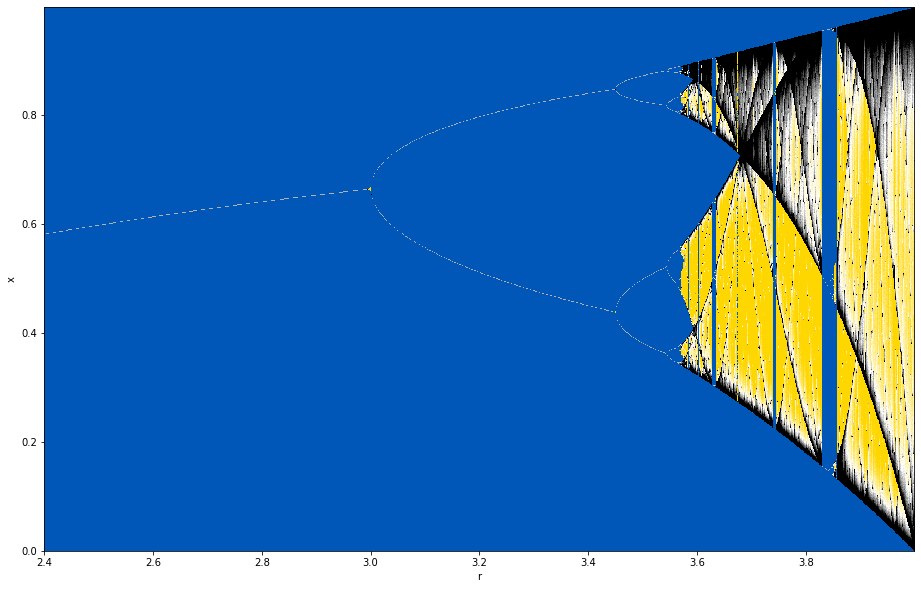

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = '#0057b7'
# pick color bar range:
zmi = .0095 * nanmax(Z)
zma = .025  * nanmax(Z)

imshow(Z, cmap = double, vmin = zmi, vmax = zma,
  interpolation = 'none', norm = LogNorm(),
  extent = (R.min(), R.max(), X.min(), X.max()))
xlabel("r")
ylabel("x")
savefig("Logistic Map Bifurcation Diagram, Matplotlib.svg")
show()